In [3]:
# Carregando os dados da Iris Dataset com sklearn
from sklearn import datasets
iris = datasets.load_iris()

# Obtendo as entradas e saídas
X, y = iris.data, iris.target

print(len(X))
print(len(y))

150
150


In [4]:
from pybrain.datasets.classification import ClassificationDataSet

dataset = ClassificationDataSet(4, 1, nb_classes=3)

# Adicionando as amostras
for i in range(len(X)):
    
    dataset.addSample(X[i], y[i])
    
len(dataset)

150

In [5]:
dataset["input"]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
dataset["target"]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [7]:
len(dataset["target"])

150

In [13]:
# Particionando os dados para treinamento
train_data, part_data = dataset.splitWithProportion(0.6)

print("Quantidade para treino: %d" % len(train_data))

# Dividindo os dados para teste e validação
test_data, val_data = part_data.splitWithProportion(0.5)

print("Quantidade para teste: %d" % len(test_data))
print("Quantidade para validação: %d" % len(val_data))

Quantidade para treino: 90
Quantidade para teste: 30
Quantidade para validação: 30


In [16]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(dataset.indim, 3, dataset.outdim)
trainer = BackpropTrainer(net, dataset=train_data, learningrate=0.01, momentum=0.1, verbose=True)
train_errors, val_errors = trainer.trainUntilConvergence(dataset=train_data, maxEpochs=100)

Total error:  1.31510702208
Total error:  0.377718405409
Total error:  0.365868199947
Total error:  0.364564102831
Total error:  0.362938564817
Total error:  0.36326191212
Total error:  0.365619737774
Total error:  0.364991259598
Total error:  0.360860731846
Total error:  0.365294991025
Total error:  0.363379584424
Total error:  0.363223277169
Total error:  0.361935714094
Total error:  0.360066609553
Total error:  0.358508930883
Total error:  0.354012830285
Total error:  0.343791001149
Total error:  0.325728277621
Total error:  0.270757638059
Total error:  0.181116568781
Total error:  0.132125788077
Total error:  0.104915856886
Total error:  0.0872561470887
Total error:  0.0756377660767
Total error:  0.0665114146882
Total error:  0.0597822358019
Total error:  0.0534972688549
Total error:  0.0502996526969
Total error:  0.0465095666054
Total error:  0.0434384887651
Total error:  0.0420006784146
Total error:  0.0398221181834
Total error:  0.0378712325326
Total error:  0.0374191319399
Tota

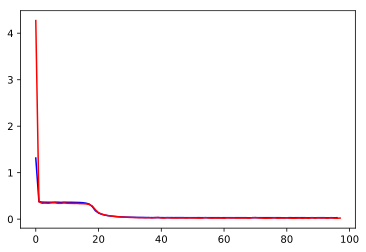

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

plt.plot(train_errors, "b", val_errors, "r")
plt.show()

In [21]:
trainer.totalepochs

101

In [22]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(dataset.indim, 3, dataset.outdim)
trainer = BackpropTrainer(net, dataset=train_data, learningrate=0.01, momentum=0.1, verbose=True)
train_errors, val_errors = trainer.trainUntilConvergence(dataset=train_data, maxEpochs=50)

Total error:  0.40445716481
Total error:  0.384859551395
Total error:  0.384359023686
Total error:  0.379361052076
Total error:  0.383089540381
Total error:  0.38323414996
Total error:  0.380898913832
Total error:  0.381962375878
Total error:  0.38401448343
Total error:  0.383098144058
Total error:  0.382605374217
Total error:  0.384321918384
Total error:  0.37307628443
Total error:  0.382934768212
Total error:  0.384648876609
Total error:  0.384446554029
Total error:  0.381958717233
Total error:  0.382467416693
Total error:  0.384827381843
Total error:  0.382847834177
Total error:  0.383687208009
Total error:  0.38491070483
Total error:  0.384143409274
Total error:  0.383684142907
Total error:  0.375908968109
Total error:  0.385527708894
Total error:  0.37744383668
Total error:  0.384541804964
Total error:  0.382512213333
Total error:  0.373601856588
Total error:  0.377706200568
Total error:  0.387681501667
Total error:  0.380779918045
Total error:  0.384715736133
Total error:  0.3843

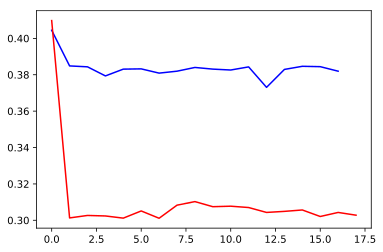

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

plt.plot(train_errors, "b", val_errors, "r")
plt.show()

In [26]:
trainer.trainOnDataset(train_data, 500)

Total error:  0.362265087906
Total error:  0.364037152642
Total error:  0.365199023072
Total error:  0.359824223449
Total error:  0.363070054574
Total error:  0.363595955342
Total error:  0.362502761474
Total error:  0.36485186419
Total error:  0.365192820982
Total error:  0.358196893467
Total error:  0.362507025223
Total error:  0.3651727572
Total error:  0.365493663161
Total error:  0.36385462534
Total error:  0.361938277206
Total error:  0.365811611003
Total error:  0.365030988613
Total error:  0.36449249293
Total error:  0.365636117201
Total error:  0.363698593406
Total error:  0.365004696204
Total error:  0.365691328928
Total error:  0.365311929864
Total error:  0.363494113956
Total error:  0.360769305229
Total error:  0.367662561767
Total error:  0.365094859411
Total error:  0.362563578996
Total error:  0.363727522697
Total error:  0.363911576559
Total error:  0.361949407749
Total error:  0.364361091777
Total error:  0.364276688984
Total error:  0.36416865895
Total error:  0.3637

In [28]:
out = net.activateOnDataset(test_data)

for i in range(len(out)):
    
    print("out: %f, correct: %f" % (out[i], test_data["target"][i]))

out: -0.014012, correct: 0.000000
out: 1.576065, correct: 2.000000
out: 0.786006, correct: 1.000000
out: 0.030817, correct: 0.000000
out: 0.953470, correct: 1.000000
out: 1.706738, correct: 2.000000
out: -0.030883, correct: 0.000000
out: 1.783298, correct: 2.000000
out: 1.676678, correct: 2.000000
out: -0.037668, correct: 0.000000
out: 1.868385, correct: 2.000000
out: 1.749268, correct: 2.000000
out: 0.556879, correct: 1.000000
out: 0.671670, correct: 1.000000
out: 0.828596, correct: 1.000000
out: -0.024455, correct: 0.000000
out: 1.859764, correct: 2.000000
out: 1.563664, correct: 2.000000
out: 0.814288, correct: 1.000000
out: 0.678186, correct: 1.000000
out: -0.026838, correct: 0.000000
out: 1.851978, correct: 2.000000
out: 1.694030, correct: 2.000000
out: 0.772636, correct: 1.000000
out: -0.029534, correct: 0.000000
out: -0.021111, correct: 0.000000
out: 1.406974, correct: 2.000000
out: -0.020075, correct: 0.000000
out: -0.030921, correct: 0.000000
out: 1.065765, correct: 1.000000
